In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [3]:
url ="https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html,'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
title = soup.title
print(title)

<title>Laptops - Buy Products Online at Best Price in India - All Categories | Flipkart.com</title>


In [6]:
reviews=[]

In [7]:
for a in soup.findAll(attrs={'class':'_KigyA'}):
    review=a.find('div',attrs={'class':'qwjRop'})
    reviews.append(review.text)
print(reviews)

['The only issue is the Microsoft office home and student is only valid for 5 days. Otherwise it is ok.Read full review', 'Pros:I like the product very much. It has both 256 GB SSD  (Windows 10 Home edition X64 runs here) + 1TB HDD. Intel 8GB ram i5 8th gen. Start and shut down...Read full review', "This laptop is a wolf in sheep's clothing .I was looking for a gaming laptop which doesn't come with the usual design aesthetics found with most of the gam...Read full review", "Well I got this laptop for Rs.70300.00(i.e. offer+credit card cashback). Flipkart delivered it 4 days. It's been a week and I just love it. It has great spec...Read full review", 'its good leptop for business work and this is very very good looking and ips display bttr working or feature more then bttr for other brand same rateRead full review']


In [8]:
df=pd.DataFrame({'reviewtext':reviews})
df.to_csv('review.csv',index=False, encoding='utf-8')

In [32]:
cd=pd.read_csv("reviews.csv")

In [33]:
cd

,reviewtext
0,The only issue is the Microsoft office home an...
1,Pros:I like the product very much. It has both...
2,This laptop is a wolf in sheep's clothing .I w...
3,Well I got this laptop for Rs.70300.00(i.e. of...
4,its good leptop for business work and this is ...
5,very bad ram
6,Good functioning of operating system
7,Bad power back up system
8,This laptop is a wolf in sheep's clothing .I w...
9,Well I got this laptop for Rs.70300.00(i.e. of...


In [34]:
import nltk
from nltk import FreqDist

In [35]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [36]:
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [37]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [38]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

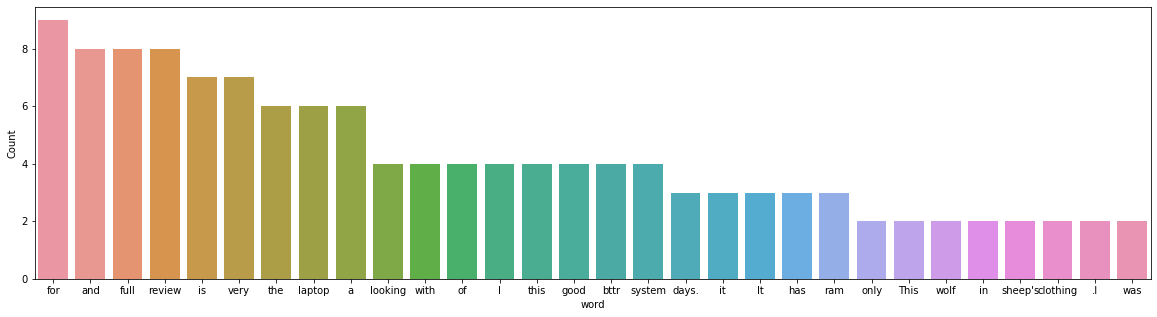

In [39]:
freq_words(cd['reviewtext'])

In [40]:
# remove unwanted characters, numbers and symbols
cd['reviewtext'] = cd['reviewtext'].str.replace("[^a-zA-Z#]", " ")

In [41]:
cd['reviewtext']

0     The only issue is the Microsoft office home an...
1     Pros I like the product very much  It has both...
2     This laptop is a wolf in sheep s clothing  I w...
3     Well I got this laptop for Rs          i e  of...
4     its good leptop for business work and this is ...
5                                         very bad ram 
6                  Good functioning of operating system
7                              Bad power back up system
8     This laptop is a wolf in sheep s clothing  I w...
9     Well I got this laptop for Rs          i e  of...
10    its good leptop for business work and this is ...
11                                        very bad ram 
12                 Good functioning of operating system
13                             Bad power back up system
Name: reviewtext, dtype: object

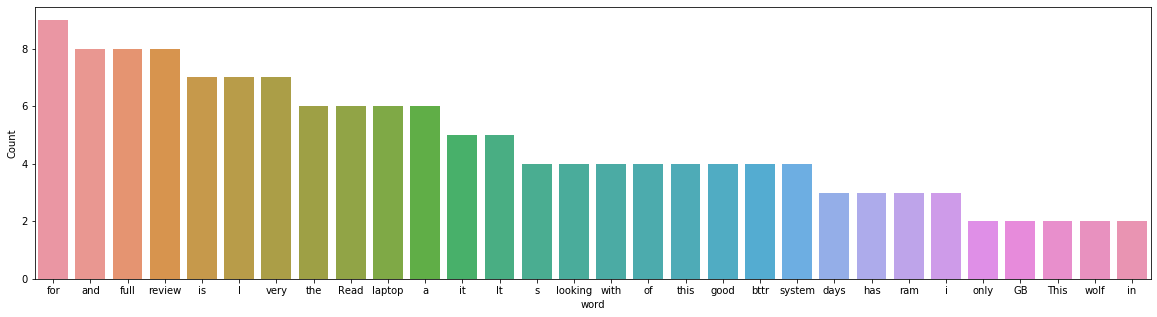

In [42]:
freq_words(cd['reviewtext'])

In [43]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
def stopwrds(x):
    stop_words = set(stopwords.words('english'))   
    word_tokens = word_tokenize(x)   
    filtered_sentence = [w for w in word_tokens if not w in stop_words]   
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return filtered_sentence
cd['text_split'] = cd.reviewtext.apply(stopwrds)
cd

,reviewtext,text_split
0,The only issue is the Microsoft office home an...,"[The, issue, Microsoft, office, home, student,..."
1,Pros I like the product very much It has both...,"[Pros, I, like, product, much, It, GB, SSD, Wi..."
2,This laptop is a wolf in sheep s clothing I w...,"[This, laptop, wolf, sheep, clothing, I, looki..."
3,Well I got this laptop for Rs i e of...,"[Well, I, got, laptop, Rs, e, offer, credit, c..."
4,its good leptop for business work and this is ...,"[good, leptop, business, work, good, looking, ..."
5,very bad ram,"[bad, ram]"
6,Good functioning of operating system,"[Good, functioning, operating, system]"
7,Bad power back up system,"[Bad, power, back, system]"
8,This laptop is a wolf in sheep s clothing I w...,"[This, laptop, wolf, sheep, clothing, I, looki..."
9,Well I got this laptop for Rs i e of...,"[Well, I, got, laptop, Rs, e, offer, credit, c..."


In [44]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
def senti(x):
    sentiment_dict = sid_obj.polarity_scores(x)
    if sentiment_dict['compound'] >= 0.05 : 
        return 1
    elif sentiment_dict['compound'] <= - 0.05 : 
        return 0 
    else: 
        return 1 
cd['sentiment'] = cd.reviewtext.apply(senti)
cd

,reviewtext,text_split,sentiment
0,The only issue is the Microsoft office home an...,"[The, issue, Microsoft, office, home, student,...",1
1,Pros I like the product very much It has both...,"[Pros, I, like, product, much, It, GB, SSD, Wi...",1
2,This laptop is a wolf in sheep s clothing I w...,"[This, laptop, wolf, sheep, clothing, I, looki...",1
3,Well I got this laptop for Rs i e of...,"[Well, I, got, laptop, Rs, e, offer, credit, c...",1
4,its good leptop for business work and this is ...,"[good, leptop, business, work, good, looking, ...",1
5,very bad ram,"[bad, ram]",0
6,Good functioning of operating system,"[Good, functioning, operating, system]",1
7,Bad power back up system,"[Bad, power, back, system]",0
8,This laptop is a wolf in sheep s clothing I w...,"[This, laptop, wolf, sheep, clothing, I, looki...",1
9,Well I got this laptop for Rs i e of...,"[Well, I, got, laptop, Rs, e, offer, credit, c...",1


In [45]:
xd=cd.drop(['reviewtext','text_split'],axis='columns')

In [46]:
xd

,sentiment
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [57]:
x=xd.iloc[0:6,]
y=xd.iloc[6:12,]

In [58]:
x

,sentiment
0,1
1,1
2,1
3,1
4,1
5,0


In [59]:
y

,sentiment
6,1
7,0
8,1
9,1
10,1
11,0


In [68]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.3,random_state=1)

In [70]:
decission = DecisionTreeRegressor()
decission.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [74]:
decission.score(x,y)

0.39999999999999997

In [75]:
y_train_prediction = decission.predict(x)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y,y_train_prediction )))
r2_training = r2_score(y, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.3651483716701108
R2 score is 0.3999999999999999


